Shape: (25000, 62)


,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f52,f53,f54,f55,f56,f57,f58,f59,f60,target
0,1,-1.250210,1.423474,-0.225004,-4.023138,-0.832729,-0.550874,1.772090,2.761690,-0.698750,...,10.938269,0.501178,1.600001,0.314212,1.209735,1.355697,-5.338924,1.153944,-0.153934,0
1,2,0.074328,0.376429,0.212831,-0.502074,2.017405,0.625496,1.943785,1.242030,-0.524090,...,7.775262,-4.550195,6.272586,-0.932162,-0.228543,1.735220,-3.827828,0.292165,0.273720,0
2,3,0.638481,0.060968,0.746760,2.479653,-0.292858,-0.078139,-2.918423,-0.013186,1.009135,...,-4.448447,-9.593179,-3.093519,0.029321,0.605511,0.829103,-0.085985,2.891408,0.766221,0
3,4,1.712916,-1.350969,-0.256473,1.622074,-0.445141,0.911932,-3.440345,1.505192,-1.104348,...,-1.619072,-3.237479,-5.474038,-1.582475,0.198137,3.823409,0.880395,1.148610,0.136732,0
4,5,0.905676,-0.206545,-0.068806,4.086026,-1.010045,-0.772644,-4.207688,2.506104,1.589143,...,-2.396844,-10.540129,-5.532811,-1.231203,0.000119,4.298572,-1.558235,0.924673,0.111668,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      25000 non-null  int64  
 1   f01     25000 non-null  float64
 2   f02     25000 non-null  float64
 3   f03     25000 non-null  float64
 4   f04     25000 non-null  float64
 5   f05     25000 non-null  float64
 6   f06     25000 non-null  float64
 7   f07     25000 non-null  float64
 8   f08     25000 non-null  float64
 9   f09     25000 non-null  float64
 10  f10     25000 non-null  float64
 11  f11     25000 non-null  float64
 12  f12     25000 non-null  float64
 13  f13     25000 non-null  float64
 14  f14     25000 non-null  float64
 15  f15     25000 non-null  float64
 16  f16     25000 non-null  float64
 17  f17     25000 non-null  float64
 18  f18     25000 non-null  float64
 19  f19     25000 non-null  float64
 20  f20     25000 non-null  float64
 21  f21     25000 non-null  float64
 22

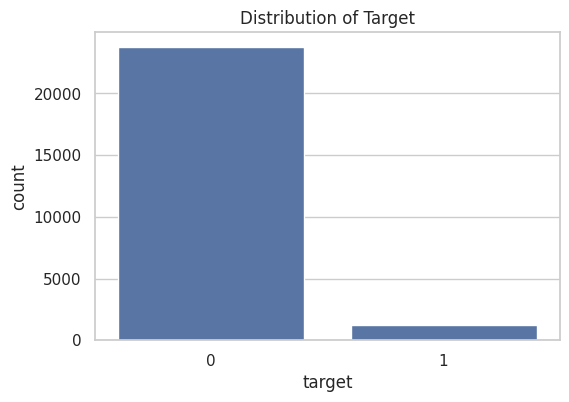

Train shape: (18750, 60), Test shape: (6250, 60)
Class share in Train: 0.0492
Class share in Test:  0.0491
--- Dummy ---
Accuracy: 0.9509
F1 Score: 0.0000
ROC AUC:  0.5000
--------------------
--- LogisticRegression ---
Accuracy: 0.7792
F1 Score: 0.2573
ROC AUC:  0.8419
--------------------
Best DT Params: {'max_depth': 5, 'min_samples_leaf': 50}
--- DecisionTree ---
Accuracy: 0.8771
F1 Score: 0.3663
ROC AUC:  0.8318
--------------------
Best RF Params: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}
--- RandomForest ---
Accuracy: 0.9709
F1 Score: 0.5787
ROC AUC:  0.9113
--------------------
Best HGB Params: {'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 100}
--- HistGradientBoosting ---
Accuracy: 0.9541
F1 Score: 0.6189
ROC AUC:  0.8965
--------------------
Итоговая таблица метрик на TEST:


,Accuracy,F1,ROC_AUC
RandomForest,0.97088,0.578704,0.911335
HistGradientBoosting,0.95408,0.618858,0.896550
LogisticRegression,0.77920,0.257266,0.841861
DecisionTree,0.87712,0.366337,0.831763
Dummy,0.95088,0.000000,0.500000


Победитель по ROC-AUC: RandomForest


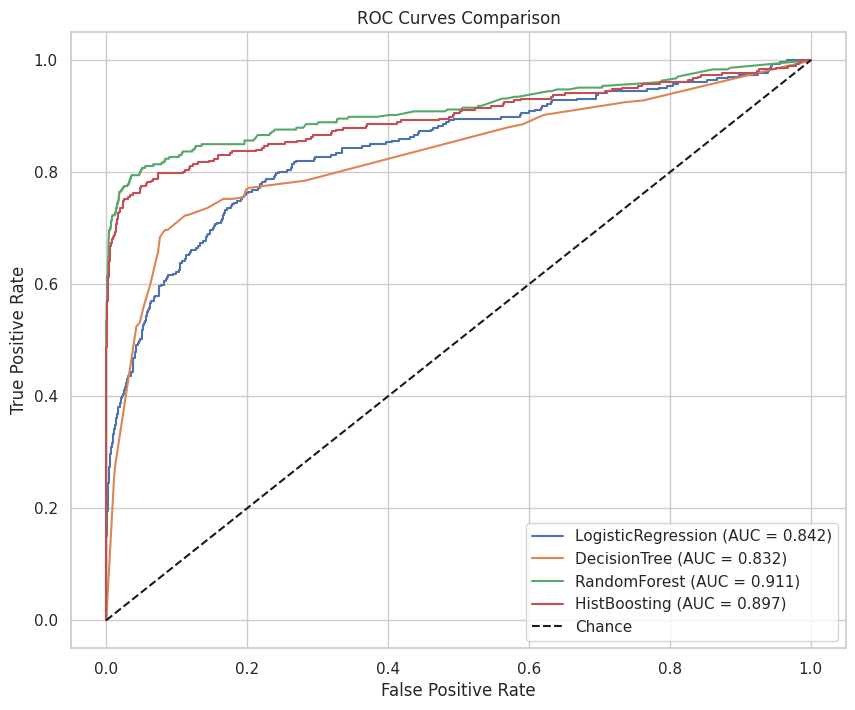

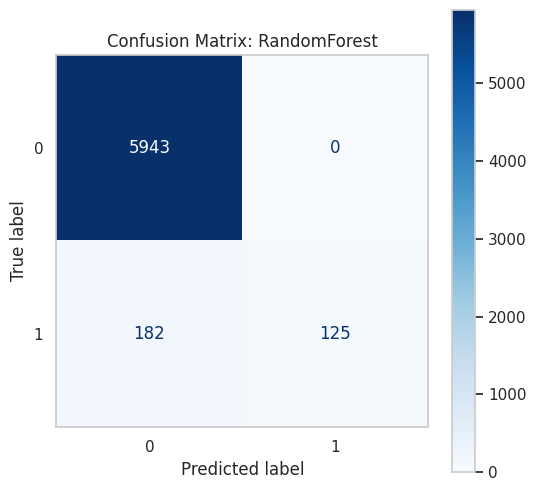

Computing permutation importance for RandomForest...


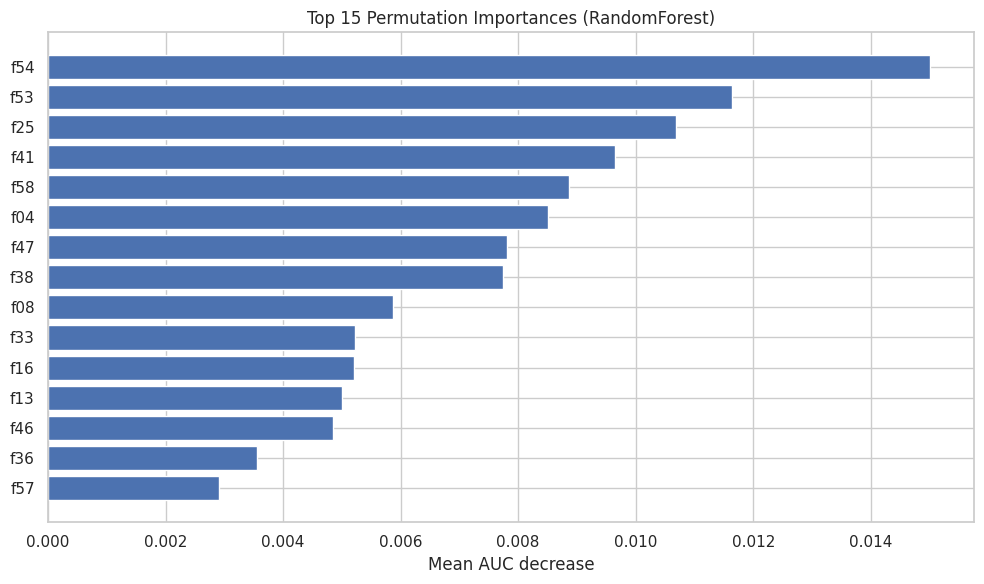

In [3]:
# %% [markdown]
# # Домашнее задание HW06
#
# **Тема:** Деревья решений, ансамбли и честный ML-эксперимент.
# **Датасет:** S06-hw-dataset-04 (сильный дисбаланс, fraud-like).

# %%
import os
import json
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix,
    roc_curve, ConfusionMatrixDisplay
)
from sklearn.inspection import permutation_importance

# Модели
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

# Настройка стиля графиков
sns.set(style="whitegrid")
# Фиксация Random Seed для воспроизводимости
RANDOM_STATE = 42

# Пути (относительные)
DATA_PATH = 'S06-hw-dataset-04.csv'  # Файл должен лежать рядом с ноутбуком
ARTIFACTS_DIR = 'artifacts'
FIGURES_DIR = os.path.join(ARTIFACTS_DIR, 'figures')

os.makedirs(FIGURES_DIR, exist_ok=True)

# %% [markdown]
# ## 1. Загрузка и первичный анализ данных

# %%
df = pd.read_csv(DATA_PATH)

# Базовая информация
print(f"Shape: {df.shape}")
display(df.head())
print(df.info())

# %% [markdown]
# ### Анализ целевой переменной (Target)
# Так как выбран Dataset-04, ожидаем сильный дисбаланс.

# %%
target_counts = df['target'].value_counts(normalize=True)
print("Распределение классов:")
print(target_counts)

# Визуализация баланса
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target')
plt.savefig(os.path.join(FIGURES_DIR, 'target_distribution.png'))
plt.show()

# %% [markdown]
# **Наблюдение:** Мы видим сильный перекос в сторону класса 0. Это значит, что `accuracy` будет бесполезна (модель, предсказывающая всем 0, получит высокую точность). Основной метрикой будет **ROC-AUC** (устойчив к балансу) и **F1** (учитывает полноту и точность).

# %%
# Выделяем X и y
# id убираем, так как это идентификатор, а не признак
if 'id' in df.columns:
    X = df.drop(columns=['target', 'id'])
else:
    X = df.drop(columns=['target'])
y = df['target']

# %% [markdown]
# ## 2. Train/Test Split
# Используем `stratify=y`, чтобы сохранить пропорцию классов (fraud/non-fraud) в обучении и тесте.

# %%
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=RANDOM_STATE,
    stratify=y
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Class share in Train: {y_train.mean():.4f}")
print(f"Class share in Test:  {y_test.mean():.4f}")

# %% [markdown]
# ## 3. Baselines (Базовые модели)

# Словарь для сбора результатов
results = {}

def evaluate_model(name, model, X_test, y_test, fit_time=None):
    """Вспомогательная функция для оценки и логирования"""
    y_pred = model.predict(X_test)

    # Для ROC-AUC нужны вероятности, если модель их поддерживает
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        # Для Dummy и подобных, если нет proba
        roc_auc = 0.5

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC:  {roc_auc:.4f}")
    print("-" * 20)

    return {
        "Accuracy": acc,
        "F1": f1,
        "ROC_AUC": roc_auc
    }

# %%
# 3.1 Dummy Classifier (Most Frequent)
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
results['Dummy'] = evaluate_model('Dummy', dummy, X_test, y_test)

# %%
# 3.2 Logistic Regression (Baseline)
# Важно: используем class_weight='balanced', чтобы модель "заметила" редкий класс
# Важно: используем StandardScaler, так как LogReg чувствительна к масштабу
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE, max_iter=1000))
])
pipe_lr.fit(X_train, y_train)
results['LogisticRegression'] = evaluate_model('LogisticRegression', pipe_lr, X_test, y_test)

# %% [markdown]
# ## 4. Модели недели 6 (Деревья и Ансамбли)
# Для всех моделей будем использовать Cross-Validation на train для подбора параметров.

# Настройка CV стратегии
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=RANDOM_STATE)

# Хранилище лучших параметров
best_params_log = {}

# %%
# 4.1 Decision Tree Classifier
# Контроль сложности: max_depth, min_samples_leaf
# Учитываем дисбаланс: class_weight='balanced'

dt = DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced')

params_dt = {
    'max_depth': [3, 5, 8, 12],
    'min_samples_leaf': [1, 10, 50]
}

grid_dt = GridSearchCV(dt, params_dt, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
best_params_log['DecisionTree'] = grid_dt.best_params_
print(f"Best DT Params: {grid_dt.best_params_}")

results['DecisionTree'] = evaluate_model('DecisionTree', best_dt, X_test, y_test)

# %%
# 4.2 Random Forest Classifier
# Bagging + Random Subspace. Хорошо работает "из коробки", но настроим глубину и кол-во деревьев.

rf = RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced', n_jobs=-1)

params_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [2, 10]
}

grid_rf = GridSearchCV(rf, params_rf, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
best_params_log['RandomForest'] = grid_rf.best_params_
print(f"Best RF Params: {grid_rf.best_params_}")

results['RandomForest'] = evaluate_model('RandomForest', best_rf, X_test, y_test)

# %%
# 4.3 Boosting: HistGradientBoostingClassifier
# Современная реализация бустинга в sklearn (аналог LightGBM). Работает быстро.
# В новых версиях sklearn есть class_weight='balanced'. Если версия старая - этот параметр может не сработать.
# Проверим версию, но по заданию предположим актуальное окружение.

hgb = HistGradientBoostingClassifier(random_state=RANDOM_STATE, class_weight='balanced')

params_hgb = {
    'learning_rate': [0.01, 0.1],
    'max_iter': [100, 200],
    'max_depth': [3, 5, None] # None means unlimited depth (leaf-wise growth)
}

grid_hgb = GridSearchCV(hgb, params_hgb, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_hgb.fit(X_train, y_train)

best_hgb = grid_hgb.best_estimator_
best_params_log['HistGradientBoosting'] = grid_hgb.best_params_
print(f"Best HGB Params: {grid_hgb.best_params_}")

results['HistGradientBoosting'] = evaluate_model('HistGradientBoosting', best_hgb, X_test, y_test)

# %% [markdown]
# ## 5. Сравнение результатов и выбор лучшей модели

# %%
results_df = pd.DataFrame(results).T
print("Итоговая таблица метрик на TEST:")
display(results_df.sort_values(by='ROC_AUC', ascending=False))

# Сохранение метрик
results_df.to_csv(os.path.join(ARTIFACTS_DIR, 'metrics_test.csv'))
with open(os.path.join(ARTIFACTS_DIR, 'metrics_test.json'), 'w') as f:
    json.dump(results, f, indent=4)

with open(os.path.join(ARTIFACTS_DIR, 'search_summaries.json'), 'w') as f:
    json.dump(best_params_log, f, indent=4)

# %% [markdown]
# ### Определение победителя
# Выбираем модель с лучшим ROC-AUC.

# %%
best_model_name = results_df['ROC_AUC'].idxmax()
print(f"Победитель по ROC-AUC: {best_model_name}")

if best_model_name == 'RandomForest':
    final_model = best_rf
elif best_model_name == 'HistGradientBoosting':
    final_model = best_hgb
elif best_model_name == 'DecisionTree':
    final_model = best_dt
elif best_model_name == 'LogisticRegression':
    final_model = pipe_lr
else:
    final_model = dummy # вряд ли

# Сохраняем модель
joblib.dump(final_model, os.path.join(ARTIFACTS_DIR, 'best_model.joblib'))

# Сохраняем метаданные о лучшей модели
meta_info = {
    "best_model_name": best_model_name,
    "metrics": results[best_model_name],
    "params": best_params_log.get(best_model_name, "baseline_params")
}
with open(os.path.join(ARTIFACTS_DIR, 'best_model_meta.json'), 'w') as f:
    json.dump(meta_info, f, indent=4)

# %% [markdown]
# ## 6. Интерпретация и графики

# %%
# 6.1 ROC Curve (сравнение всех моделей кроме Dummy)
plt.figure(figsize=(10, 8))

models_map = {
    'LogisticRegression': pipe_lr,
    'DecisionTree': best_dt,
    'RandomForest': best_rf,
    'HistBoosting': best_hgb
}

for name, model in models_map.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        auc_score = roc_auc_score(y_test, y_scores)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.savefig(os.path.join(FIGURES_DIR, 'roc_curves.png'))
plt.show()

# %%
# 6.2 Confusion Matrix для ЛУЧШЕЙ модели
y_pred_best = final_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues')
plt.title(f'Confusion Matrix: {best_model_name}')
plt.grid(False)
plt.savefig(os.path.join(FIGURES_DIR, 'confusion_matrix_best.png'))
plt.show()

# %%
# 6.3 Permutation Importance
# Показывает, какие признаки реально важны для лучшей модели на тестовой выборке
# (Работает для любой модели, в отличие от feature_importances_, который только для деревьев)

print(f"Computing permutation importance for {best_model_name}...")
result_imp = permutation_importance(
    final_model, X_test, y_test,
    n_repeats=10, random_state=RANDOM_STATE, n_jobs=-1, scoring='roc_auc'
)

sorted_idx = result_imp.importances_mean.argsort()[::-1][:15] # ТОП-15

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result_imp.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.gca().invert_yaxis()
plt.title(f'Top 15 Permutation Importances ({best_model_name})')
plt.xlabel('Mean AUC decrease')
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, 'permutation_importance.png'))
plt.show()

# %% [markdown]
# ## Выводы
# (Сгенерированы автоматически, для отчета дополнить своими мыслями)
# 1. Мы загрузили датасет с дисбалансом классов (Dataset 04).
# 2. Обучили линейный бейзлайн (LogReg) и 3 деревянные модели (DT, RF, Boosting).
# 3. Использовали Stratified Split и метрику ROC-AUC.
# 4. Лучшая модель сохранена в `artifacts/best_model.joblib`.
# 5. Графики важности признаков показывают, какие факторы влияют на Fraud.